In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
df = pd.read_sql_table('cloud', 'sqlite:///dissertation.db') 

In [3]:
df_copy = df.copy()
df_copy

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
0,2019-12-23 00:00:00,89.5,-1,0,0,0,weekday,0.000249
1,2019-12-23 00:00:10,88.0,-1,0,0,0,weekday,0.000244
2,2019-12-23 00:00:20,88.5,-1,0,0,0,weekday,0.000246
3,2019-12-23 00:00:30,88.5,-1,0,0,0,weekday,0.000246
4,2019-12-23 00:00:40,88.5,-1,0,0,0,weekday,0.000246
...,...,...,...,...,...,...,...,...
1451515,2020-06-07 23:59:10,133.0,23,6,23,59,holiday,0.000369
1451516,2020-06-07 23:59:20,133.0,23,6,23,59,holiday,0.000369
1451517,2020-06-07 23:59:30,136.0,23,6,23,59,holiday,0.000378
1451518,2020-06-07 23:59:40,133.5,23,6,23,59,holiday,0.000371


In [32]:
week = pd.DataFrame({'Week_kWh' : (df_copy.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df_copy.groupby( ['day_name'])['kWh'].sum()/24)}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df_copy.groupby( ['hour'])['kWh'].sum()/24)}).reset_index()

In [33]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,18.800640
std,7.144345,2.729446
min,-1.000000,14.953293
25%,5.750000,16.556343
50%,11.500000,19.197905
75%,17.250000,20.586479
max,23.000000,22.391349


In [34]:
day

,day_name,day_kWh
0,0,2.663192
1,1,2.667754
2,2,2.683657
3,3,2.677626
4,4,2.688109
5,5,2.709274
6,6,2.711029


In [11]:
hour

,hour,hour_kWh
0,0,0.783849
1,1,0.783766
2,2,0.783737
3,3,0.783618
4,4,0.783177
5,5,0.781771
6,6,0.782390
7,7,0.781692
8,8,0.781854
9,9,0.782154


## Clustering Starts from Here

In [12]:
df_clustering =pd.read_sql_table('cloud_hub_tsfel', 'sqlite:///dissertation.db')

In [13]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     140 non-null    int64  
 1   0_Absolute energy         140 non-null    float64
 2   0_Mean                    140 non-null    float64
 3   0_Max                     140 non-null    float64
 4   0_Standard deviation      140 non-null    float64
 5   0_FFT mean coefficient_0  140 non-null    float64
 6   0_Spectral kurtosis       140 non-null    float64
 7   0_Skewness                140 non-null    float64
 8   0_Zero crossing rate      140 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.0 KB


In [14]:
df_clustering['time'] = pd.date_range(start="12/23/2019", end="05/10/2020", freq='D')

In [15]:
# prepare data for clustering
df_clustering['weekofyear']=df_clustering['time'].dt.week
df_clustering['day_categ']=df_clustering['time'].dt.day_name()
df_clustering['day_num']=df_clustering['time'].dt.weekday
df_clustering['day']=df_clustering['time'].dt.day


df_clustering['day_type'] = df_clustering['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_clustering.loc[(df_clustering.time >= '2019-12-24') & (df_clustering.time < '2019-12-26'), 'day_type']='holiday' #christmas
df_clustering.loc[(df_clustering.time == '2020-01-01'), 'day_type']='holiday' #new year
# lockdown week 13
df_clustering.loc[(df_clustering.weekofyear >12) & (df_clustering.weekofyear <25), 'day_type'] = 'holiday'

In [16]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     140 non-null    int64         
 1   0_Absolute energy         140 non-null    float64       
 2   0_Mean                    140 non-null    float64       
 3   0_Max                     140 non-null    float64       
 4   0_Standard deviation      140 non-null    float64       
 5   0_FFT mean coefficient_0  140 non-null    float64       
 6   0_Spectral kurtosis       140 non-null    float64       
 7   0_Skewness                140 non-null    float64       
 8   0_Zero crossing rate      140 non-null    float64       
 9   time                      140 non-null    datetime64[ns]
 10  weekofyear                140 non-null    int64         
 11  day_categ                 140 non-null    object        
 12  day_num               

In [20]:
df_clustering_ok=df_clustering.drop(['index','weekofyear','time','day','day_num','0_Zero crossing rate'],axis=1)
df_clustering_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   day_categ                 140 non-null    object 
 8   day_type                  140 non-null    object 
dtypes: float64(7), object(2)
memory usage: 10.0+ KB


In [21]:
df_dum = pd.get_dummies(df_clustering_ok)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   day_categ_Friday          140 non-null    uint8  
 8   day_categ_Monday          140 non-null    uint8  
 9   day_categ_Saturday        140 non-null    uint8  
 10  day_categ_Sunday          140 non-null    uint8  
 11  day_categ_Thursday        140 non-null    uint8  
 12  day_categ_Tuesday         140 non-null    uint8  
 13  day_categ_Wednesday       140 non-null    uint8  
 14  day_type_h

In [22]:
df_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ_Friday,day_categ_Monday,day_categ_Saturday,day_categ_Sunday,day_categ_Thursday,day_categ_Tuesday,day_categ_Wednesday,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.998648,0.655917,-0.124548,-0.109023,0.326663,-0.153258,0.003172,-0.031488,0.034514,0.037689,-0.012934,-0.025576,-0.005378,0.763399,-0.550171,-0.245788
0_Mean,0.998648,1.000000,0.651991,-0.129090,-0.107715,0.345672,-0.151792,0.003237,-0.032171,0.033990,0.036337,-0.011900,-0.026061,-0.003433,0.748258,-0.540030,-0.239929
0_Max,0.655917,0.651991,1.000000,0.197105,0.074671,-0.161156,0.332876,0.070686,-0.141278,-0.090563,-0.110719,0.086290,0.045328,0.140256,0.498967,-0.231076,-0.324816
0_Standard deviation,-0.124548,-0.129090,0.197105,1.000000,0.689370,-0.149824,0.003158,0.162803,-0.079169,-0.111202,-0.123955,-0.042802,0.102983,0.091343,-0.137855,0.258381,-0.158751
0_FFT mean coefficient_0,-0.109023,-0.107715,0.074671,0.689370,1.000000,0.043823,-0.026166,0.272187,-0.069690,-0.078202,-0.080903,-0.062454,0.016383,0.002679,-0.147356,0.215047,-0.091594
0_Spectral kurtosis,0.326663,0.345672,-0.161156,-0.149824,0.043823,1.000000,-0.065621,0.055780,0.043991,0.102805,0.091382,-0.097591,-0.073053,-0.123315,0.006475,-0.091208,0.108457
0_Skewness,-0.153258,-0.151792,0.332876,0.003158,-0.026166,-0.065621,1.000000,0.083233,-0.128213,-0.010310,-0.127260,0.110809,-0.025932,0.097673,-0.170260,0.185841,-0.025828
day_categ_Friday,0.003172,0.003237,0.070686,0.162803,0.272187,0.055780,0.083233,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Monday,-0.031488,-0.032171,-0.141278,-0.079169,-0.069690,0.043991,-0.128213,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Saturday,0.034514,0.033990,-0.090563,-0.111202,-0.078202,0.102805,-0.010310,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,-0.363976,0.487415


<Figure size 2160x720 with 0 Axes>

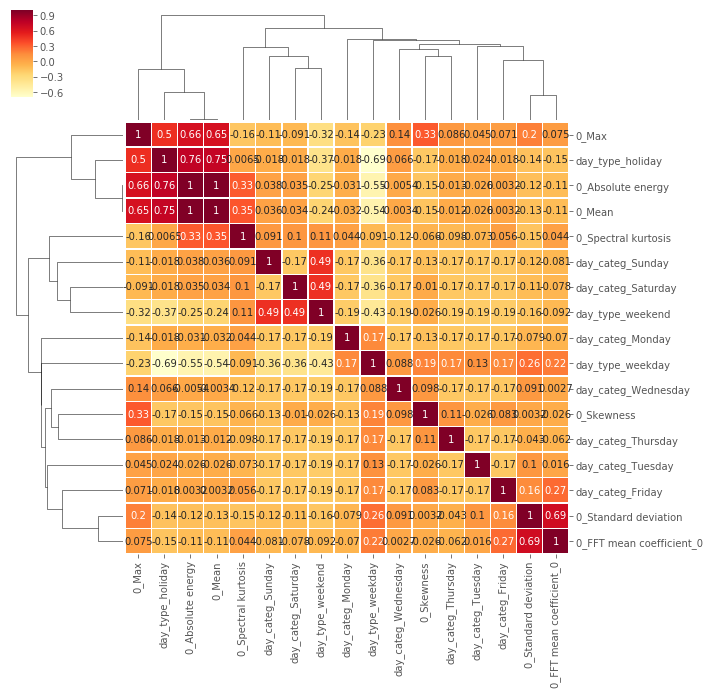

In [23]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr = df_dum.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

In [24]:
from sklearn.cluster import KMeans

In [25]:
# before clustering the values needing scaled 
import sklearn.preprocessing as preprocessing
df_scaled = preprocessing.scale(df_dum)

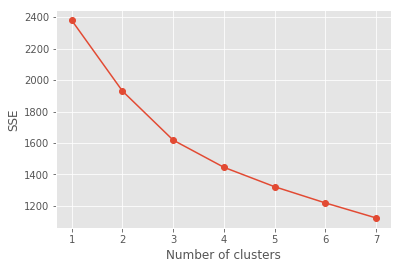

In [26]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 7
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [27]:
k_cluster = 3
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [28]:
# assign labels to original dataframe
df_label=df_clustering_ok.assign(label=kmeans_method.labels_)

In [36]:
df_label.loc[df_label.label==2]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,day_type,label
0,0.000526,0.000247,0.000285,0.000001,1.303665e-14,8.731672,6.586186,Monday,weekday,2
1,0.000527,0.000247,0.000293,0.000002,1.396046e-14,8.695395,8.266768,Tuesday,holiday,2
2,0.000529,0.000247,0.000283,0.000001,1.283771e-14,8.063485,-15.208919,Wednesday,holiday,2
3,0.000528,0.000247,0.000290,0.000001,1.070547e-14,9.558374,10.407764,Thursday,weekday,2
4,0.000529,0.000247,0.000285,0.000001,9.694962e-15,10.847902,10.461176,Friday,weekday,2
7,0.000530,0.000248,0.000294,0.000001,1.165352e-14,9.450659,14.954802,Monday,weekday,2
8,0.000530,0.000248,0.000286,0.000001,8.410021e-15,10.912226,11.592061,Tuesday,weekday,2
9,0.000530,0.000248,0.000286,0.000001,7.904432e-15,10.735293,13.600460,Wednesday,holiday,2
10,0.000531,0.000248,0.000417,0.000005,8.321859e-14,6.338837,22.076547,Thursday,weekday,2
11,0.000530,0.000248,0.000289,0.000001,1.020984e-14,9.608635,10.921557,Friday,weekday,2


## Daily Clustering Starts from Here

In [37]:
df_hour = pd.read_sql_table('cloud_hub_hourtsfel', 'sqlite:///dissertation.db')

In [38]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3360 non-null   int64  
 1   0_Absolute energy         3360 non-null   float64
 2   0_Mean                    3360 non-null   float64
 3   0_Max                     3360 non-null   float64
 4   0_Standard deviation      3360 non-null   float64
 5   0_FFT mean coefficient_0  3360 non-null   float64
 6   0_Spectral kurtosis       3360 non-null   float64
 7   0_Skewness                3360 non-null   float64
 8   0_Zero crossing rate      3360 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 236.4 KB


In [39]:
df_hour['time'] = pd.date_range(start="12/23/2019 00:00:00", end="05/10/2020 23:00:00", freq='H')

In [40]:
# prepare data for clustering
df_hour['weekofyear']=df_hour['time'].dt.week
df_hour['day_categ']=df_hour['time'].dt.day_name()
df_hour['day_num']=df_hour['time'].dt.weekday
df_hour['day']=df_hour['time'].dt.day
df_hour['hour']=df_hour['time'].dt.hour
df_hour['hour']=df_hour['hour'].astype('object')

df_hour['day_type'] = df_hour['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_hour.loc[(df_hour.time >= '2019-12-24 00:00:00') & (df_hour.time < '2019-12-26 00:00:00'), 'day_type']='holiday' #christmas
df_hour.loc[(df_hour.time >= '2020-01-01 00:00:00') & (df_hour.time < '2020-01-02 00:00:00'), 'day_type']='holiday' #new year
# lockdown week 13
df_hour.loc[(df_hour.weekofyear >12) & (df_hour.weekofyear <25), 'day_type'] = 'holiday'

In [44]:
df_hour_ok=df_hour.drop(['index','weekofyear','time','day','day_num','0_Zero crossing rate'],axis=1)
df_hour_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   day_categ                 3360 non-null   object 
 8   hour                      3360 non-null   object 
 9   day_type                  3360 non-null   object 
dtypes: float64(7), object(3)
memory usage: 262.6+ KB


In [45]:
df_hour_dum = pd.get_dummies(df_hour_ok)
df_hour_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   day_categ_Friday          3360 non-null   uint8  
 8   day_categ_Monday          3360 non-null   uint8  
 9   day_categ_Saturday        3360 non-null   uint8  
 10  day_categ_Sunday          3360 non-null   uint8  
 11  day_categ_Thursday        3360 non-null   uint8  
 12  day_categ_Tuesday         3360 non-null   uint8  
 13  day_categ_Wednesday       3360 non-null   uint8  
 14  hour_0  

In [46]:
df_hour_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ_Friday,day_categ_Monday,day_categ_Saturday,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.998607,0.953828,0.078458,-0.024119,-0.149351,-0.204955,3.157018e-03,-3.133492e-02,3.434676e-02,...,-8.356727e-04,2.851321e-03,3.386235e-03,4.604603e-03,4.789857e-03,4.742725e-03,4.505100e-03,7.596908e-01,-5.474986e-01,-2.445942e-01
0_Mean,0.998607,1.000000,0.953355,0.075608,-0.025971,-0.140919,-0.211414,3.219257e-03,-3.199185e-02,3.380105e-02,...,-8.499692e-04,2.956206e-03,3.306410e-03,4.485294e-03,4.685817e-03,4.627727e-03,4.380625e-03,7.440915e-01,-5.370230e-01,-2.385926e-01
0_Max,0.953828,0.953355,1.000000,0.289113,0.076238,-0.314776,-0.023854,1.165546e-02,-3.867585e-02,2.012027e-02,...,9.226945e-03,-7.098613e-03,-1.511116e-02,-1.275747e-02,-1.451022e-02,-8.701122e-03,-1.551178e-02,7.169414e-01,-5.045401e-01,-2.463496e-01
0_Standard deviation,0.078458,0.075608,0.289113,1.000000,0.761108,-0.406995,0.091356,3.474082e-02,-3.303884e-02,-3.237412e-02,...,6.833202e-02,-5.160054e-03,-2.342232e-02,-2.622920e-02,-3.199023e-02,-2.457178e-02,-3.343522e-02,6.842252e-02,-4.541035e-03,-7.921604e-02
0_FFT mean coefficient_0,-0.024119,-0.025971,0.076238,0.761108,1.000000,-0.108046,-0.006261,2.258590e-02,-1.640328e-02,-1.823901e-02,...,8.399066e-02,-6.780264e-03,-8.697777e-03,-8.111132e-03,-9.896650e-03,-1.001612e-02,-9.800886e-03,-3.122610e-02,4.742620e-02,-2.177994e-02
0_Spectral kurtosis,-0.149351,-0.140919,-0.314776,-0.406995,-0.108046,1.000000,-0.368005,3.458904e-03,2.002424e-02,-1.226517e-02,...,-3.523620e-02,4.220438e-02,4.845218e-02,6.022021e-02,5.996373e-02,3.383372e-02,5.772380e-02,-2.363358e-01,1.551401e-01,9.548674e-02
0_Skewness,-0.204955,-0.211414,-0.023854,0.091356,-0.006261,-0.368005,1.000000,1.497684e-02,-5.744198e-03,-2.198283e-02,...,2.096945e-02,-4.282301e-02,-8.281472e-02,-5.318587e-02,-6.019844e-02,-5.136464e-02,-6.446398e-02,-1.464380e-01,1.187663e-01,3.024833e-02
day_categ_Friday,0.003157,0.003219,0.011655,0.034741,0.022586,0.003459,0.014977,1.000000e+00,-1.666667e-01,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Monday,-0.031335,-0.031992,-0.038676,-0.033039,-0.016403,0.020024,-0.005744,-1.666667e-01,1.000000e+00,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Saturday,0.034347,0.033801,0.020120,-0.032374,-0.018239,-0.012265,-0.021983,-1.666667e-01,-1.666667e-01,1.000000e+00,...,5.664601e-17,5.667554e-17,5.670508e-17,5.685275e-17,6.633313e-17,7.545910e-17,7.548863e-17,-1.810517e-02,-3.639761e-01,4.874147e-01


<Figure size 2160x720 with 0 Axes>

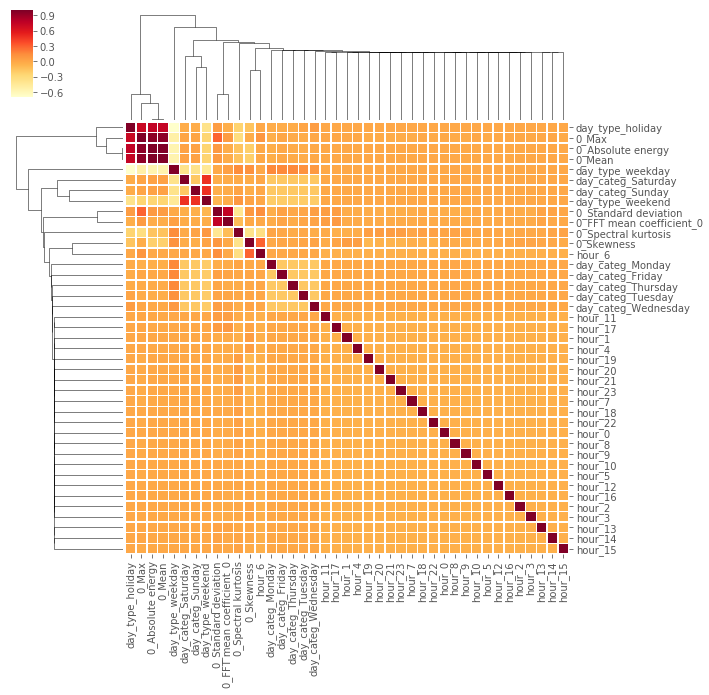

In [47]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr_hour = df_hour_dum.corr()

ax_ =sns.clustermap(corr_hour,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 10})

In [48]:
df_hour_scaled = preprocessing.scale(df_hour_dum) 

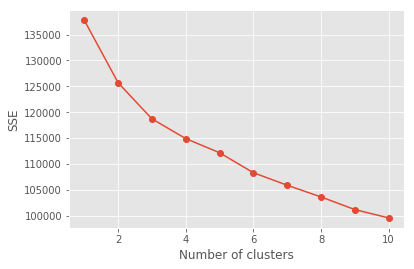

In [49]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 10
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

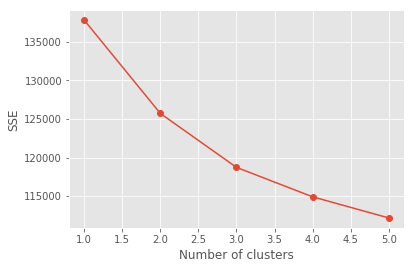

In [67]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 5
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [68]:
hour_k_cluster = 3
random_seed = 1
hour_kmeans_method = KMeans(n_clusters=hour_k_cluster,random_state=random_seed)
hour_kmeans_method.fit(df_hour_scaled)

KMeans(n_clusters=3, random_state=1)

In [69]:
df_hour_label=df_hour_ok.assign(label=hour_kmeans_method.labels_)

In [70]:
df_hour_gr1=df_hour_label.loc[df_hour_label.label==1]

In [71]:
df_hour_gr2=df_hour_label.loc[df_hour_label.label==0]

In [72]:
df_hour_gr3=df_hour_label.loc[df_hour_label.label==2]

In [75]:
pd.set_option('display.max_rows', None)

In [81]:
df_hour_label.loc[df_hour_label.label==2]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,hour,day_type,label
67,21.960100,0.246944,0.252778,0.004327,5.705428e-10,11.097480,-17.731744,Wednesday,19,holiday,2
254,23.357249,0.253526,0.416667,0.024611,1.490275e-06,8.228841,4.988976,Thursday,14,weekday,2
419,23.383067,0.253727,0.427778,0.023993,4.644448e-07,7.554112,5.715418,Thursday,11,weekday,2
541,25.622162,0.263437,0.430556,0.042111,1.060657e-05,9.465733,3.234345,Tuesday,13,weekday,2
563,28.541462,0.274614,0.441667,0.062200,3.496276e-05,7.836572,2.061931,Wednesday,11,weekday,2
566,23.586354,0.254560,0.440278,0.026772,1.526674e-06,10.288632,6.060606,Wednesday,14,weekday,2
1214,29.564252,0.285818,0.437500,0.020762,1.249847e-06,7.239197,5.449525,Tuesday,14,weekday,2
1234,30.170289,0.288179,0.426389,0.027554,3.288181e-06,10.416387,4.059317,Wednesday,10,weekday,2
1625,29.126809,0.282770,0.336111,0.030804,1.724467e-05,22.109440,1.002520,Friday,17,weekday,2
1626,37.220150,0.321327,0.341667,0.011754,6.490287e-07,49.900150,0.456449,Friday,18,weekday,2


In [74]:
df_hour_gr1.groupby(['hour','day_type']).count()

,,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,label
hour,day_type,,,,,,,,,
0,weekend,26,26,26,26,26,26,26,26,26
1,weekend,26,26,26,26,26,26,26,26,26
2,weekend,26,26,26,26,26,26,26,26,26
3,weekend,26,26,26,26,26,26,26,26,26
4,weekend,26,26,26,26,26,26,26,26,26
5,weekend,26,26,26,26,26,26,26,26,26
6,weekend,26,26,26,26,26,26,26,26,26
7,weekend,26,26,26,26,26,26,26,26,26
8,weekend,26,26,26,26,26,26,26,26,26


In [65]:
df_hour_gr2.groupby(['hour','day_type','day_categ']).count()

0_Absolute energy  0_Mean  0_Max  \
hour day_type day_categ                                     
0    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
1    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
2    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
3    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
4    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
5    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
6    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  12      12     12   
              Tuesday                   12      12     12   
              Wednesday                 10      10     10   
7    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
8    holiday  Tuesday                    1       1      1   
              Wednesday                  2       2      2   
     weekday  Friday                    13      13     13   
              Monday                    13      13     13   
              Thursday                  13      13     13   
              Tuesday                   12      12     12   
              Wednesday                 11      11     11   
9    holiday  Tuesday                    1       1      1   